# Import useful packages

In [1]:
#!pip install ipympl
# importing sys
#!pip install wget
# download utilsLaris form github
import wget
import os
import ipywidgets as widgets
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import utilsLaris
os.environ['NUMEXPR_MAX_THREADS'] = '16'

## Import utilsLaris from github

In [2]:
import os
if os.path.isfile("utilsLaris.py")==True:
    os. remove("utilsLaris.py")
wget.download("https://raw.githubusercontent.com/Ah-essabar/LARIS01/master/utilsLaris.py")

'utilsLaris.py'

# Import data from web server

In [3]:
import os
if os.path.isfile("s114.php")==True:
    os. remove("s114.php")
if os.path.isfile("s219.php")==True:
    os. remove("s219.php")    
wget.download("https://biot.u-angers.fr/s219.php")
wget.download("https://biot.u-angers.fr/s114.php")

's114.php'

# Read data

In [3]:
#raw_data = pd.read_csv("test.txt", sep=";")
raw_data = pd.read_csv("s114.php", sep=";")


## OutliersToNan

In [4]:
data,outliers = utilsLaris.outliersToNan(raw_data)

##  Separate sensors and save as dictionary

In [5]:
# Separate sensors and save as dictionary
filename = "s114"
# separteSensors(data, filename, save=False)
DataSensors = utilsLaris.separteSensors(data,filename, True )

#np.save(filename+'.npy', DataSensors) 

We have  12  sensors. Their Id are  [120, 119, 118, 126, 125, 124, 123, 122, 121, 129, 128, 127]
sensor_120
sensor_119
sensor_118
sensor_126
sensor_125
sensor_124
sensor_123
sensor_122
sensor_121
sensor_129
sensor_128
sensor_127


## Load separated data and resample it

In [18]:
salle = 219
filename = "s"+str(salle)
filename = filename+'.npy'
import numpy as np
dictionary = np.load(filename,allow_pickle='TRUE').item()
dictSensors = dictionary.copy()
dict = dictSensors .copy()
dictSensors = utilsLaris.resampleSensors(dictSensors,period='5T')
dict = dictSensors .copy()

## dataFusion

In [19]:
df1,df2,df3,df4,df = utilsLaris.dataFusion(dictSensors, salle = salle)

In [20]:
#ax = df1.iloc[100:2000,:].plot(figsize=(15, 6))
dataMaster = df2.copy()
colonnesNames = utilsLaris.seperateGrandeurs(dataMaster)
colonnesNames

{'temperature': ['temperature_104',
  'temperature_105',
  'temperature_106',
  'temperature_107'],
 'co2': ['co2_104', 'co2_105', 'co2_106', 'co2_107'],
 'humidity': ['humidity_104', 'humidity_105', 'humidity_106', 'humidity_107'],
 'sound': ['sound_104', 'sound_105', 'sound_106', 'sound_107'],
 'tvoc': ['tvoc_104', 'tvoc_105', 'tvoc_106', 'tvoc_107']}

In [21]:
list(colonnesNames.keys())

['temperature', 'co2', 'humidity', 'sound', 'tvoc']

['temperature_104', 'temperature_105', 'temperature_106', 'temperature_107']


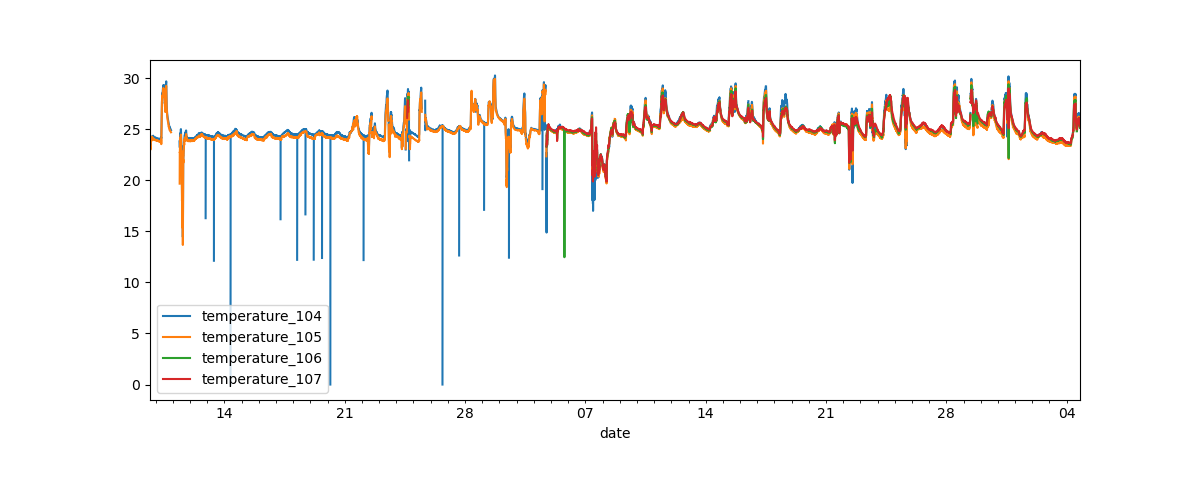

In [23]:
colonnesName = colonnesNames['temperature']
print(colonnesName)
ax = dataMaster.loc[:,colonnesName].iloc[100:,:].plot(figsize=(12, 5)) 
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.legend(loc='lower left')
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.show()

In [16]:
colonnesNames
targets = ["co2", "temperature"]
result = [colonnesNames[key] for key in colonnesNames.keys() if key in targets]

In [17]:
result

[['temperature_121', 'temperature_122', 'temperature_123'],
 ['co2_121', 'co2_122', 'co2_123']]

In [ ]:
from sklearn.ensemble import IsolationForest
X =x.iloc[:,0:]

clf = IsolationForest(random_state=0).fit(X)
y=clf.predict(X)

In [18]:
x = data.iloc[:,4:]

x= x[~np.isnan(x).any(axis=1)]

In [ ]:
y.sum()

# Detect outliersset_index

In [20]:
filt_df= raw_data.copy()
low = .05
high = .95
quant_df = filt_df.quantile([low, high])
print(quant_df)


            id  sensor     co2     tvoc  temperature  humidity  light  sound
0.05   16103.4   100.0   399.0     7.00        23.27     21.91    0.0    9.0
0.95  329870.6   112.0  1284.0  2300.15        27.13     36.87  717.0  803.0


In [21]:
sns.boxplot(raw_data['co2'])

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='co2'>

In [22]:
a=raw_data['co2']>10000
a.sum()

0

In [23]:
data["co2"].max()

4834.0

## deal with outliers?

In [19]:
raw_data.drop(outliers, inplace = True)
print(len(raw_data))


313122


In [29]:
raw_data.drop(['id'], axis=1).head()

,date,room,sensor,co2,tvoc,temperature,humidity,light,sound
0,21/03/2022 14:25:13,S219,107,507,67,24.57,31.46,548,511
1,21/03/2022 14:25:03,S219,106,443,68,24.57,31.57,427,507
2,21/03/2022 14:24:53,S219,105,1087,167,24.78,31.34,494,511
3,21/03/2022 14:24:43,S219,104,620,51,24.87,31.33,623,512
4,21/03/2022 14:23:43,S219,107,506,52,24.55,31.50,552,510


# Separate sensors

## Data fusion 

In [45]:
## fusion des données par master and all
dfs =[dict['sensor_100'],dict['sensor_101'],dict['sensor_102'], dict['sensor_103']]
df1 = dfs[0].join(dfs[1:])
dfs =[dict['sensor_104'],dict['sensor_105'],dict['sensor_106'], dict['sensor_107']]
df2 = dfs[0].join(dfs[1:])
dfs =[dict['sensor_108'],dict['sensor_109'],dict['sensor_110']]
df3 = dfs[0].join(dfs[1:])
dfs =[dict['sensor_111'],dict['sensor_112'],dict['sensor_113']]
df4 = dfs[0].join(dfs[1:])
dfs = [df1,df2,df3,df4]
df = dfs[0].join(dfs[1:])

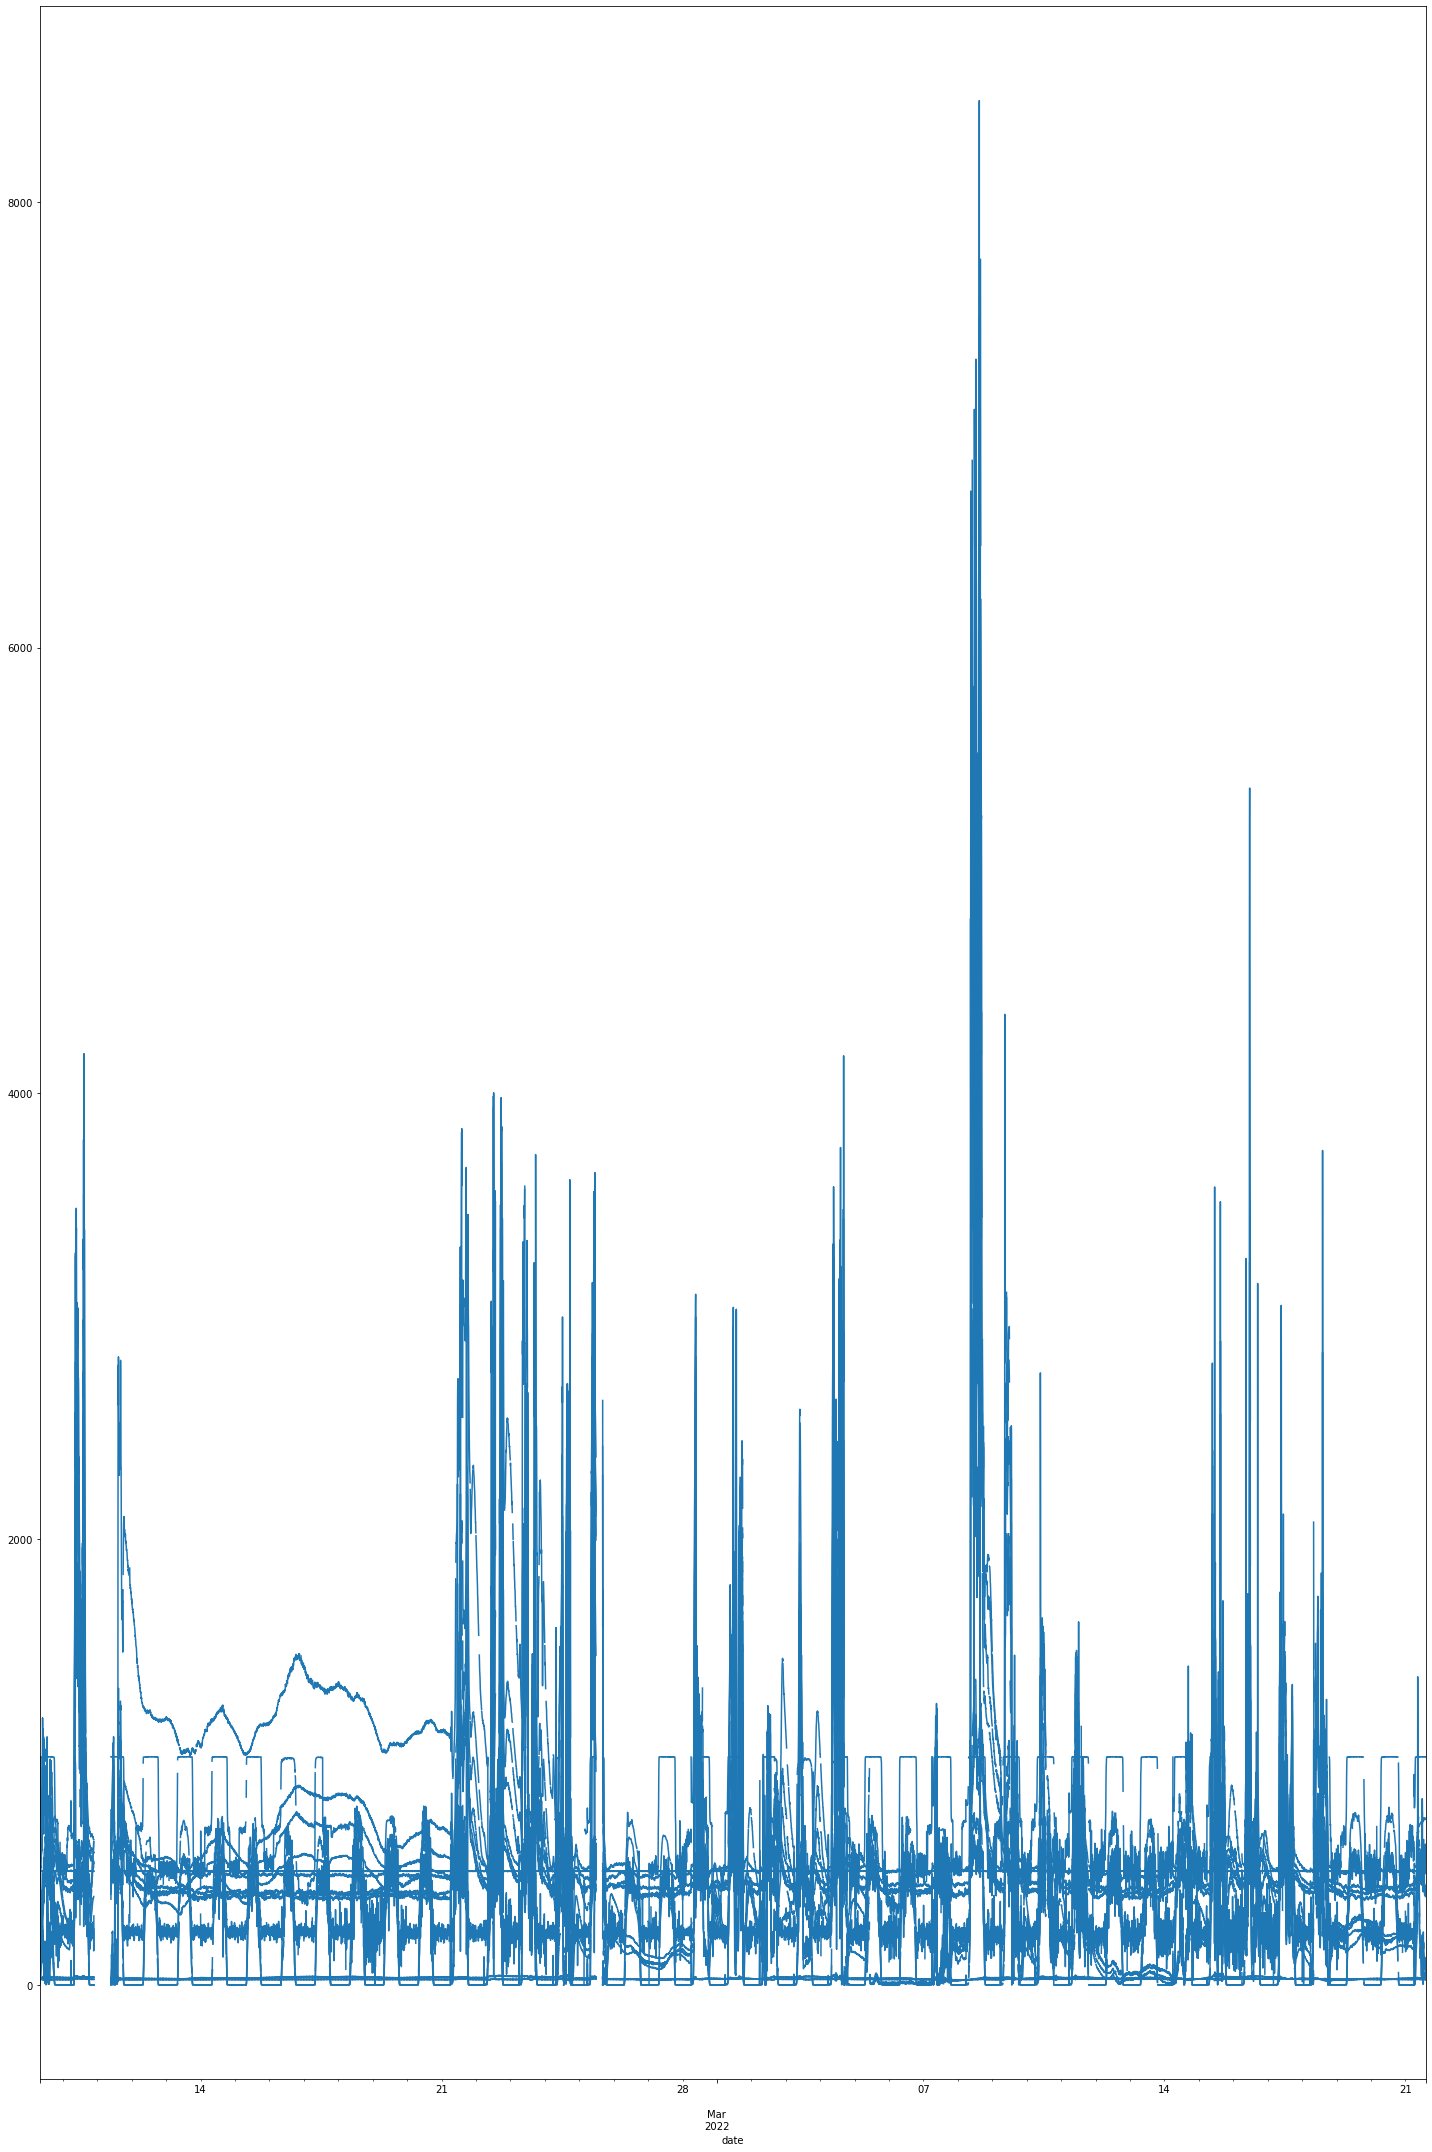

In [46]:
dfs = [df1,df2,df3,df4]
dfs = [df1]
for df in dfs :    
    df.resample('2H').plot(figsize=(20, 30), subplots=True)

# Analyse measured data

In [13]:
corr = raw_data.corr()
corr

,id,sensor,co2,tvoc,temperature,humidity,light,sound
id,1.000000,0.324379,0.016087,-0.230451,0.316584,-0.186467,-0.025811,0.036051
sensor,0.324379,1.000000,0.056038,-0.136411,0.197886,-0.122700,-0.295595,0.175360
co2,0.016087,0.056038,1.000000,0.384276,0.427614,0.185503,0.195979,0.044872
tvoc,-0.230451,-0.136411,0.384276,1.000000,0.088187,0.247642,0.153040,-0.001005
temperature,0.316584,0.197886,0.427614,0.088187,1.000000,0.187113,0.120714,0.063187
humidity,-0.186467,-0.122700,0.185503,0.247642,0.187113,1.000000,0.015199,0.007550
light,-0.025811,-0.295595,0.195979,0.153040,0.120714,0.015199,1.000000,0.064373
sound,0.036051,0.175360,0.044872,-0.001005,0.063187,0.007550,0.064373,1.000000


sns.pairplot(sensor_100.drop(["id","date","room","sensor"],axis=1), hue="co2")

In [24]:
sns.violinplot(x="sensor", y="temperature", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='temperature'>

<AxesSubplot:xlabel='sensor', ylabel='co2'>

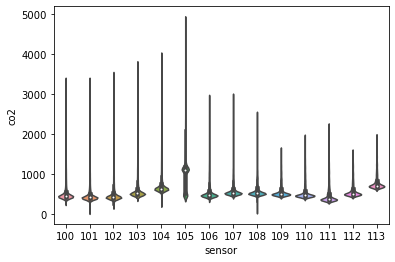

In [15]:
sns.violinplot(x="sensor", y="co2", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='tvoc'>

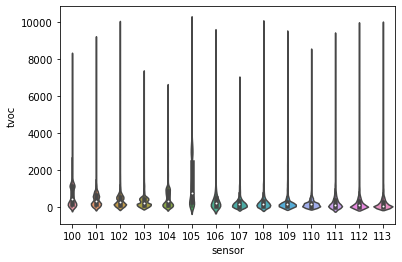

In [16]:
sns.violinplot(x="sensor", y="tvoc", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='humidity'>

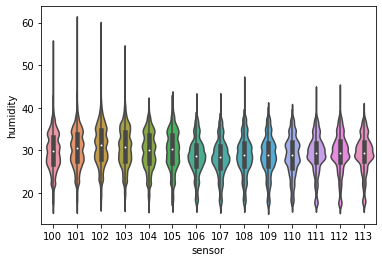

In [17]:
sns.violinplot(x="sensor", y="humidity", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='light'>

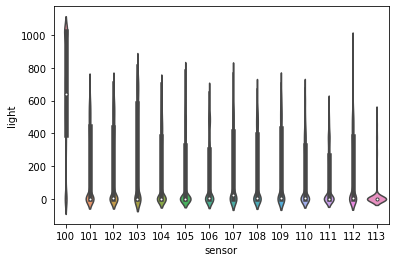

In [18]:
sns.violinplot(x="sensor", y="light", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='sound'>

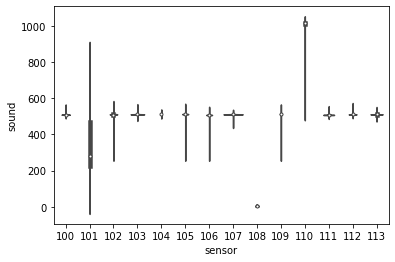

In [19]:
sns.violinplot(x="sensor", y="sound", data=raw_data)

In [25]:
# for sensor 100

axs = sensor_100.plot(figsize=(20, 30), subplots=True)

NameError: name 'sensor_100' is not defined

In [7]:
# Compare data from all sensors
import ipywidgets as widgets
%matplotlib widget

excluded_sensors = [105,106,107]
sensors_list_updated = np.delete(sensors_list, [np.where(sensors_list == i) for i in excluded_sensors])
print("Sensors to display : ",sensors_list_updated)

values = ["co2","tvoc","temperature","humidity" ,"light","sound"]
units  = ["ppm","ppb","°C","%","-","-"]

hours = mdates.HourLocator(interval = 2)
h_fmt = mdates.DateFormatter('%H:%M')
days = mdates.DayLocator(interval=5)
d_fmt = mdates.DateFormatter('%Y-%m-%d')

for i,i_value in enumerate(values):
    fig, ax = plt.subplots(figsize=(20,10))
    
    for i_sensor in sensors_list_updated : 
        globals()['ax_%s' % i_sensor] = pd.Series(globals()['sensor_%s' % i_sensor][i_value+'_'+str(i_sensor)]).plot(grid=True, 
                                                                                                   label=str(i_sensor))
    
    plt.ylabel((i_value+" "+units[i]), fontsize=14)
    plt.xlabel('Time', fontsize=14)
    plt.title(i_value, fontsize=16)    
    ax.xaxis.set_minor_locator(hours)
    ax.xaxis.set_minor_formatter(h_fmt)
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(d_fmt)
    ax.get_xaxis().set_tick_params(which='major', pad=15) #major locator under minor
    plt.legend(loc="upper left")

    #display plot
    plt.show()

NameError: name 'sensors_list' is not defined

NameError: name 'sensor_100' is not defined

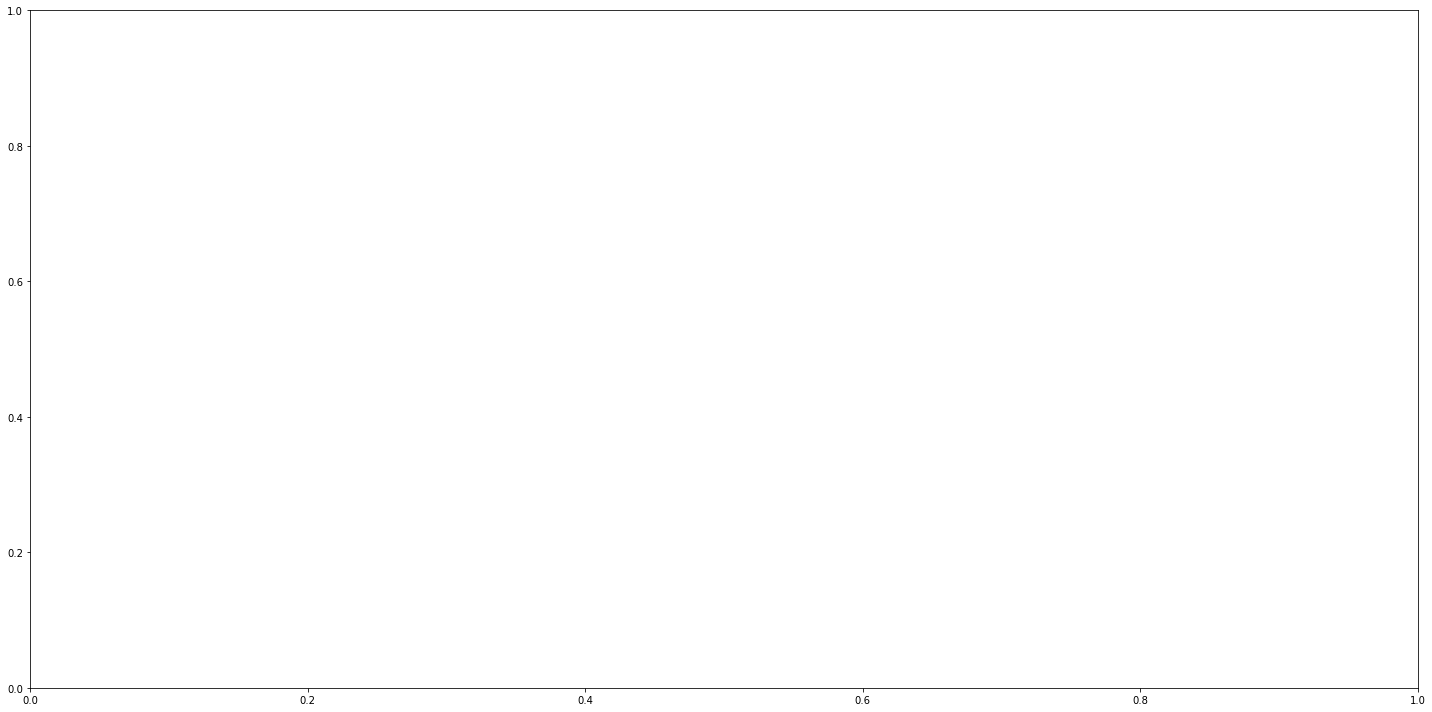

In [35]:
# Verif bonne prise en compte des dates
i_value = "temperature"
fig, ax = plt.subplots(figsize=(20,10))
df1 = pd.Series(sensor_100[i_value+'_100'])[0:5000]
df2 = pd.Series(sensor_101[i_value+'_101'])[5000:10000]

ax1 = df1.plot(grid=True, label='100')
ax2 = df2.plot(grid=True, label='101')

plt.ylabel((i_value+" "+units[i]), fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(i_value, fontsize=16)
    
ax.xaxis.set_minor_locator(hours)
ax.xaxis.set_minor_formatter(h_fmt)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.get_xaxis().set_tick_params(which='major', pad=15) #major locator under minor
plt.legend(loc="upper left")

plt.show()

In [332]:
print(sensor_100.shape, sensor_101.shape)

(32448, 9) (32399, 9)


In [333]:
sensor_103.id

date
2022-03-21 14:09:18    362801
2022-03-21 14:07:48    362797
2022-03-21 14:06:18    362793
2022-03-21 14:04:48    362789
2022-03-21 14:03:18    362785
                        ...  
2022-02-09 08:02:02        28
2022-02-09 07:56:59        22
2022-02-09 07:55:09        16
2022-02-09 07:53:19        10
2022-02-09 07:51:29         4
Name: id, Length: 32349, dtype: int64

In [51]:
# fusion de des capteurs
sensor_100.sort_index(inplace=True)
sensor_101.sort_index(inplace=True)
sensor_101_ = sensor_100.copy()
sensor_100_ = sensor_100.copy()
print("before", sensor_100_.shape,sensor_101_.shape, sensor_100_.co2_100.isnull().sum())
sensor_100_ = sensor_100_.resample('5T').mean()
sensor_101_ = sensor_101_.resample('5T').mean()
print("After", sensor_100_.shape,sensor_101.shape, sensor_100_.co2_100.isnull().sum())
df_inner = sensor_100_.merge(sensor_101_, how='left', left_index=True, right_index=True)
df_inner.shape

before (32448, 6) (32448, 6) 0
After (11596, 6) (32399, 6) 607


(11596, 12)

In [48]:
sensor_100_

<ipython-input-362-e3312272993a>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sensor_100_['2022-03-02'].co2.plot()


<AxesSubplot:xlabel='date'>

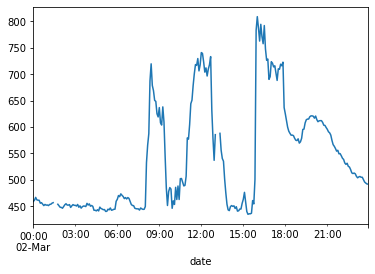

In [362]:
sensor_100_['2022-03-02'].co2.plot()

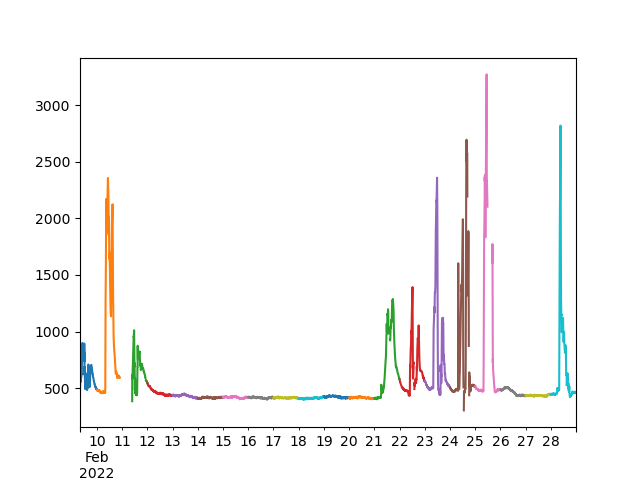

In [443]:
import ipywidgets as widgets
%matplotlib widget
sensor_100_.loc['2022-02', 'co2'].resample('D').plot()
plt.show()

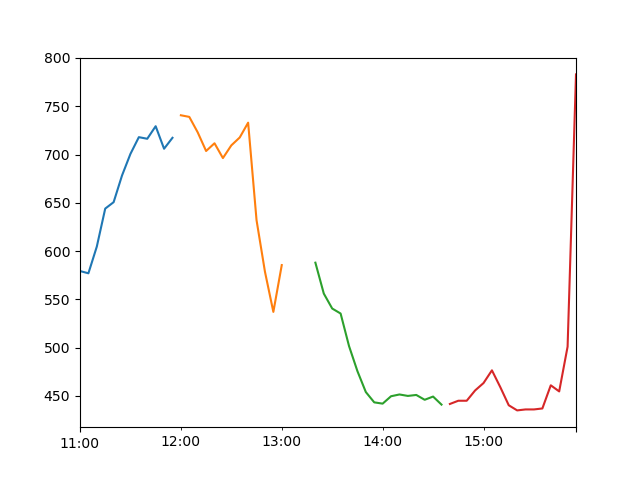

In [440]:
import matplotlib.pyplot as plt

import ipywidgets as widgets
%matplotlib widget

sensor_100_.loc['2022-03-02 11':'2022-03-02 15', 'co2'].resample('1.33H').plot()
plt.show()

In [359]:
sensor_100.sort_index(inplace=True)
y=sensor_100.index
ydif=y[1:]-y[:-1]
ydif.min()

Timedelta('0 days 00:00:27')

In [363]:
ydif.max()
hawks = sensor_100_

<Figure size 720x432 with 0 Axes>

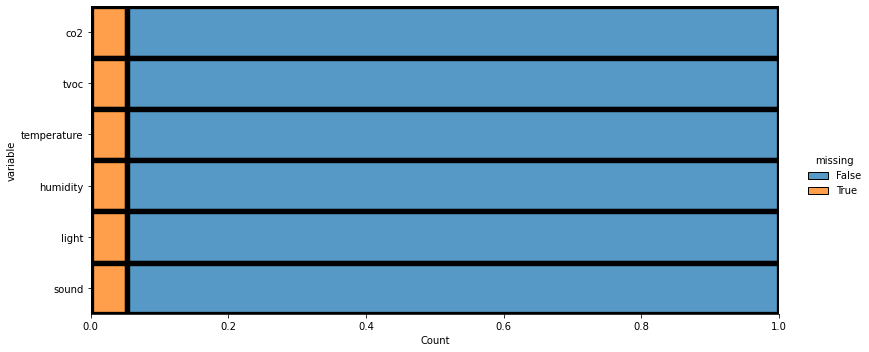

In [370]:
plt.figure(figsize=(10,6))
sns.displot(
    data=hawks.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [376]:

ydif=y[1:]-y[:-1]
ydif.min()

Timedelta('0 days 00:05:00')

In [377]:
ydif.max()

Timedelta('0 days 00:05:00')

In [ ]:
for i in range(1150):
    print(sensor_100_[['co2', 'temperature','humidity']][i*10:(i+1)*10])

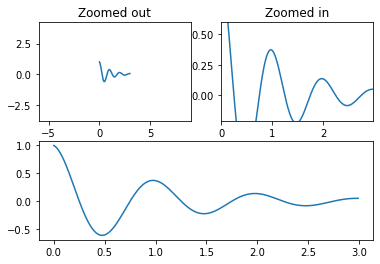

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

In [44]:
# fusion de des capteurs
sensor_100.sort_index(inplace=True)
sensor_101.sort_index(inplace=True)
sensor_101_ = sensor_101.drop(['id','room','sensor'],axis=1)
sensor_100_ = sensor_100.drop(['id','room','sensor'],axis=1)
print("before", sensor_100_.shape,sensor_101_.shape, sensor_100_.co2.isnull().sum())
sensor_100_ = sensor_100_.resample('5T').mean()
sensor_101_ = sensor_101_.resample('5T').mean()
print("After", sensor_100_.shape,sensor_101.shape, sensor_100_.co2.isnull().sum())
df_inner = sensor_100_.merge(sensor_101_, how='left', left_index=True, right_index=True)
df_inner.shape

NameError: name 'sensor_100_' is not defined

In [101]:
# Importing
import sklearn

import pandas as pd
 
# Load the dataset

bos_hou = raw_data.copy()

 
# Create the dataframe
column_name = bos_hou.columns
df_boston = bos_hou
df_boston.columns = column_name
print(df_boston.head())
 
''' Detection '''
# IQR
Q1 = np.percentile(df_boston['co2'], 5,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_boston['co2'], 95,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_boston.shape)
 
# Upper bound
upper = np.where(df_boston['co2'] >= (Q3+5*IQR))
# Lower bound
lower = np.where(df_boston['co2'] <= (Q1-2*IQR))
 
''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)
 
print("New Shape: ", df_boston.shape)

       id                 date  room  sensor   co2  tvoc  temperature  \
0  362981  21/03/2022 14:25:13  S219     107   507    67        24.57   
1  362980  21/03/2022 14:25:03  S219     106   443    68        24.57   
2  362979  21/03/2022 14:24:53  S219     105  1087   167        24.78   
3  362978  21/03/2022 14:24:43  S219     104   620    51        24.87   
4  362977  21/03/2022 14:23:43  S219     107   506    52        24.55   

   humidity  light  sound  
0     31.46    548    511  
1     31.57    427    507  
2     31.34    494    511  
3     31.33    623    512  
4     31.50    552    510  
Old Shape:  (313809, 10)
New Shape:  (313728, 10)


In [102]:
df_boston.max()

id                          362981
date           28/02/2022 23:59:55
room                          S219
sensor                         113
co2                           4834
tvoc                         65535
temperature                 655.35
humidity                    655.35
light                        65535
sound                        65535
dtype: object

In [30]:
help(utilsLaris.seperateGrandeurs)

print (utilsLaris.seperateGrandeurs.__doc__)

Help on function seperateGrandeurs in module utilsLaris:

seperateGrandeurs(df, grandeurs={'temperature': [], 'co2': [], 'humidity': [], 'sound': [], 'tvoc': []})
    Demonstrates triple double quotes
    docstrings and does nothing really.

Demonstrates triple double quotes
    docstrings and does nothing really.


In [2]:
grandeurs = ["temperature","co2","humidity","sound","tvoc"]

In [6]:
grandeurs = {grandeurs[i]: [] for i in range(len(grandeurs))}
grandeursTemp=grandeurs.copy()
for grandeursTemp_key in  grandeursTemp:
    grandeursTemp[grandeursTemp_key] = []  

In [7]:
grandeursTemp

{'temperature': [], 'co2': [], 'humidity': [], 'sound': [], 'tvoc': []}